Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Большое спасибо за качественную работу - было приятно ее проверять.
* Радует, что ноутбук хорошо структурирован и очень чист.
- Я оставил некоторые советы, обрати на них внимание. Надеюсь они будут полезными или интересными
- Ты успешно справился с задачей машинного обучения для текстов, поздравляю!
* Отправляю проект назад, чтобы ты дополнил работу(по желанию) и задал вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту.



<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

<div class="alert alert-block alert-info">
<b> </b>  Люман, доброго времени суток, спасибо за комментарии и советыю.  Bert попробую локально, потом colab)
</div>


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<div class="alert alert-block alert-success">
<b>Успех:</b> Спасибо за подробное описание проекта
</div>

## Подготовка

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты и настройки на месте
</div>

In [2]:
df = pd.read_csv('C:/Users/sergey.volkov/Desktop/YP/toxic_comments.csv')
df

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


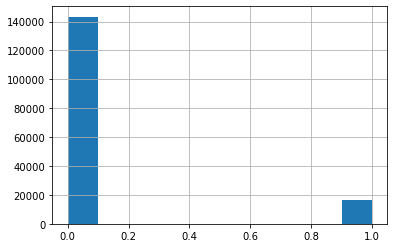

In [4]:
df['toxic'].hist();

In [5]:
df['toxic'].value_counts()

0    143346
1     16225
Name: toxic, dtype: int64

<div class="alert alert-block alert-success">
<b>Успех:</b> Дисбаланс обнаружен
</div>

In [6]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sergey.volkov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sergey.volkov\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
from nltk.stem import WordNetLemmatizer 

Для того, чтобы найти правильный POS-тег для каждого слова, сопоставим его с правильным входным символом, который принимает WordnetLemmatizer, и передадим его в качестве второго аргумента в lemmatize().
В nltk для этого есть метод nltk.pos_tag(). Он принимает список слов, а возвращает кортеж с тегом POS. Ключевым моментом здесь является сопоставление POS-тегов NLTK с форматом, принятым лемматизатором wordnet.

Воспользуемся готовыми и напишем функции для лемматизации текста:
get_wordnet_pos(word) - возвращает POS тэг для слова(к какой части речи относится слово)
clear_text(text) - приводит к нижнему регистру и очишает от символом, кроме букв английского алфавита(через re)
lemmatize(text) - проводит лемматизацию текста

In [9]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [10]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemm_list = nltk.word_tokenize(text)
    lemm_text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lemm_list])      
    return lemm_text

In [11]:
def clear_text(text):
    clear_text = re.sub(r'[^a-zA-Z]', ' ', text)
    clear_text = clear_text.lower().split()
    return ' '.join(clear_text)

Проверим, что функции работают корректно на тексте первой строке обучающей выборки:

In [12]:
df.loc[0, 'text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [13]:
lemmatize(clear_text(df.loc[0, 'text']))

'explanation why the edits make under my username hardcore metallica fan be revert they weren t vandalism just closure on some gas after i vote at new york doll fac and please don t remove the template from the talk page since i m retire now'

In [14]:
%%time
df['lemm_text'] = df['text'].apply(lambda text: lemmatize(clear_text(text)))

Wall time: 1h 43min 32s


Выведем полученный результат и соотношение меток целевого признака в тестовой выборке:

In [15]:
df.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour i m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not try to edit war it s ju...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestion on impro...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


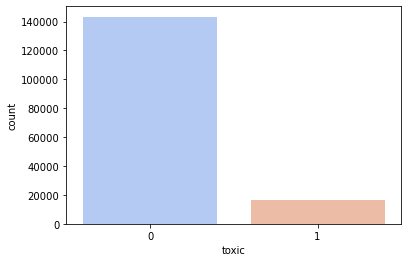

In [16]:
sns.countplot(x='toxic', data=df, palette='coolwarm');

<div class="alert alert-block alert-success">

<b>Успех:</b> Очистика и лемматизация были определены и применены корректно, приятно видеть результаты до/после
</div>


Для того, чтобы сохранить результаты лемматизации и не запускать снова трудоемкий процесс, сохраним в csv и будем использовать его.

In [17]:
df.to_csv('lemm_toxic_comments.csv', index=False)

In [18]:
df = pd.read_csv('lemm_toxic_comments.csv')

<div class="alert alert-block alert-success">

<b>Успех:</b> Хорошее решение
</div>


## Обучение

Разделим датафрейм на 2 части: обучающую и тестовую выбороки в пропорциях 4:1, используя функцию train_test_split из библиетеки sklearn.model_selection

In [19]:
train_features, test_features, train_target, test_target = train_test_split(
    df['lemm_text'], df['toxic'], test_size=0.25, random_state=17)

In [20]:
train_features, test_features, train_target, test_target = train_test_split(
    df['lemm_text'], df['toxic'], test_size=0.25, random_state=17)

Создададим корпуса слов для обучающей и тестовой выборок:

In [21]:
train_corpus = train_features.values
test_corpus = test_features.values

<div class="alert alert-block alert-info">
<b>Совет: </b> Приводить английские тексты к юникоду не имеет смысла, так как это приводит только к увеличению занимаемой памяти. 
</div>

Чтобы почистить мешок слов, найдём стоп-слова. Используем пакет stopwords, который находится в модуле nltk.corpus библиотеки nltk

In [22]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sergey.volkov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = set(stopwords.words('english'))

Вычислим TF-IDF для корпуса текстов
Рассчитать TF-IDF можно и в библиотеке sklearn. Класс TfidfVectorizer() в модуле sklearn.feature_extraction.text. Импортируем его:

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

Создадим счётчик, указав в нём стоп-слова, вызовем функцию .fit_transform() для обучающей выборки и .transform() для тестовой:

In [25]:
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
train_tf_idf = count_tf_idf.fit_transform(train_corpus)
test_tf_idf = count_tf_idf.transform(test_corpus)

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что обучил векторизатор только на тренировочной части данных. Это уменьшает переобучение.
</div>

In [26]:
#Выведем размеры получившихся матриц:
print("Размер обучающей матрицы:", train_tf_idf.shape), 
print("Размер тестовой матрицы:", test_tf_idf.shape)

Размер обучающей матрицы: (119678, 128432)
Размер тестовой матрицы: (39893, 128432)


In [27]:
#Напишем функцию scoring(fitted_model) для определения метрики f1_score для тестовой выбороки:
def scoring(fitted_model):
    test_pred = fitted_model.predict(test_tf_idf)
    test_f1 = f1_score(test_target, test_pred)
    
    print('F1 на тестовой выборке: {:.3f}'.format(test_f1))

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

Стратегия кросс-валидации для подбора параметров:

In [29]:
cv = ShuffleSplit(n_splits=2, test_size=0.25, random_state=17)

1. Обучим логистическую регресиию LogisticRegression как базовую модель

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression(random_state=17, class_weight='balanced')

In [32]:
log_reg_params = {'C': np.linspace(0.0001, 100, 10)}

In [33]:
%%time
log_reg_grid = GridSearchCV(log_reg, log_reg_params, scoring='f1')
log_reg_grid.fit(train_tf_idf, train_target)

Wall time: 3min 12s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          random_state=17),
             param_grid={'C': array([1.00000e-04, 1.11112e+01, 2.22223e+01, 3.33334e+01, 4.44445e+01,
       5.55556e+01, 6.66667e+01, 7.77778e+01, 8.88889e+01, 1.00000e+02])},
             scoring='f1')

In [34]:
print('best parameters: ', log_reg_grid.best_params_)
print('best scores: ', log_reg_grid.best_score_)

best parameters:  {'C': 11.1112}
best scores:  0.7598411622380644


In [35]:
log_reg_grid.best_estimator_

LogisticRegression(C=11.1112, class_weight='balanced', random_state=17)

#Оценка F1_score:

In [37]:
%%time
scoring(log_reg_grid.best_estimator_)

F1 на тестовой выборке: 0.761
Wall time: 27.1 ms


Обучим модель градиентного бустинга LGBMClassifier

In [39]:
from lightgbm import LGBMClassifier

In [40]:
lgbm_clf = LGBMClassifier(n_jobs=-1, random_state=17, class_weight='balanced')

In [41]:
lgbm_clf_params = {'n_estimators': [500],
                   'learning_rate': [0.1, 0.3, 0.5]}

In [42]:
%%time
lgbm_clf_grid = GridSearchCV(lgbm_clf, lgbm_clf_params, scoring='f1')
lgbm_clf_grid.fit(train_tf_idf, train_target)

Wall time: 25min 7s


GridSearchCV(estimator=LGBMClassifier(class_weight='balanced', random_state=17),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'n_estimators': [500]},
             scoring='f1')

In [43]:
print('best parameters: ', lgbm_clf_grid.best_params_)
print('best scores: ', lgbm_clf_grid.best_score_)

best parameters:  {'learning_rate': 0.3, 'n_estimators': 500}
best scores:  0.7638517446786832


In [44]:
lgbm_clf_grid.best_estimator_

LGBMClassifier(class_weight='balanced', learning_rate=0.3, n_estimators=500,
               random_state=17)

Оценка F1_score:

In [45]:
%%time
scoring(lgbm_clf_grid.best_estimator_)

F1 на тестовой выборке: 0.769
Wall time: 3.28 s


In [ ]:
data = {'Модель':['LogisticRegression', 'LGBMClassifier'],
        'Скорость обучения':['27.1 ms', '3.28 s'],
        'Качество предсказания по TF-IDF': [0.761, 0.769]}
df1 = pd.DataFrame(data) 
df1        

## Выводы

Общий вывод:

По результатам исследований моделей для поставленной задачи наиболее оптимальными являются LogisticRegression
LogisticRegression - базовая модель, показывает хорошие показатели метрик и скорости обучения и предсказания, очень проста в настройке и не требует особой настройки гиперпараметров по сетке. Очень хорошо работает с предобработанными данными, т.е. после TF-IDF.
В целом обе модели дают хорошие показатели метрики, но по скорости обучения отличаются.

<div class="alert alert-block alert-success">
<b>Успех:</b> Этот шаг был сделан отлично.  Радует, что ты попробовал разные модели


<div class="alert alert-block alert-info">
<b>Совет: </b> Напомню, что внутри кросс-валидации происходих разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a>.

<div class="alert alert-block alert-info"> 
<b> </b> Спасибо за пайплайн, я как раз пытаюсь его освоить.
</div>


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны